In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [55]:
iris = load_iris()

In [56]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [57]:
iris.target[0]

np.int64(0)

In [58]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [59]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [60]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'petal width (cm)')

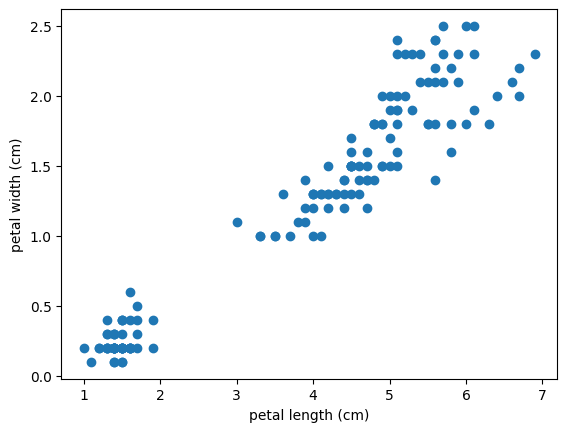

In [61]:
# SCATTER PLOT
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [62]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [63]:
df.cluster.unique()

array([1, 2, 0], dtype=int32)

In [64]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [65]:
# SEPARATING DATAFRAME BASED ON CLUSTER
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

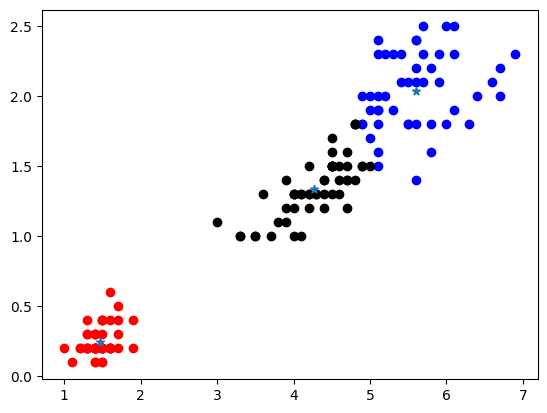

In [66]:
# PLOT GRAPH
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="red")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="black")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="*")

In [67]:
km_range = range(1,10)
SSE = []
for i in km_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    SSE.append(km.inertia_)

Text(0.5, 0, 'K')

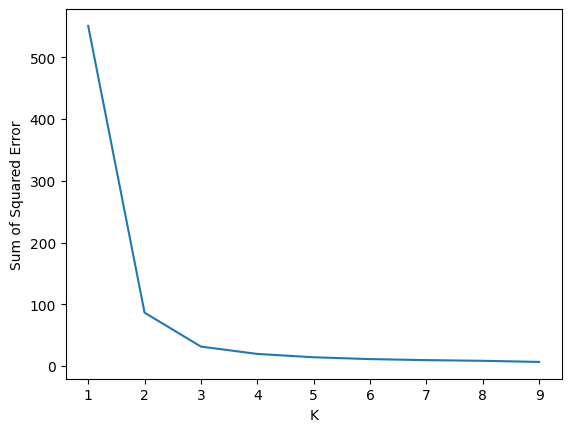

In [68]:
# ELBOW PLOT
plt.plot(km_range, SSE)
plt.ylabel("Sum of Squared Error")
plt.xlabel("K")

In [69]:
# USING MIN MAX SCALER
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
df.head()

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,0.067797,0.041667,1
1,4.9,3.0,0.067797,0.041667,1
2,4.7,3.2,0.050847,0.041667,1
3,4.6,3.1,0.084746,0.041667,1
4,5.0,3.6,0.067797,0.041667,1


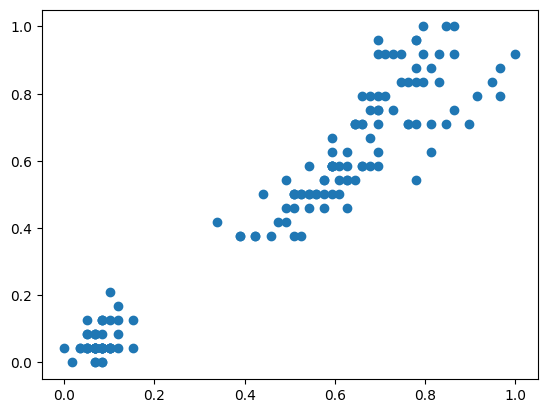

In [70]:
# PLOTTING SCATTER GRAPH AFTER MIN MAX SCALER
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [71]:
# FITTING IN MODEL AGAIN
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
df['cluster']=km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'].head()

0    0
1    0
2    0
3    0
4    0
Name: cluster, dtype: int32

In [72]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

In [73]:
df.cluster.unique()

array([0, 2, 1], dtype=int32)

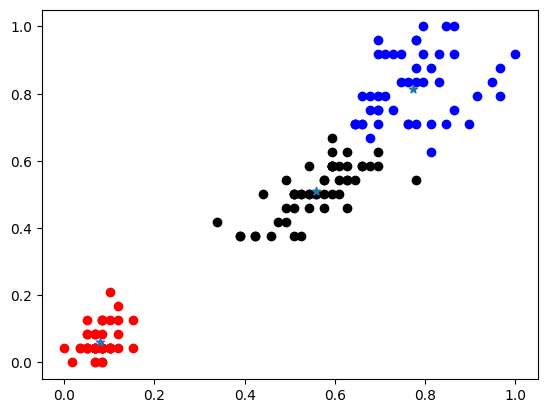

In [75]:
# FILTERING DATAFRAME BASED ON COLUMNS
df1=df[df['cluster']==0]
df2= df[df['cluster']==1]
df3= df[df['cluster']==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="red")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="blue")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="black")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="*")

In [76]:
#ELBOW PLOT
km_range = range(1,10)
SSE= []
for i in km_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    SSE.append(km.inertia_)

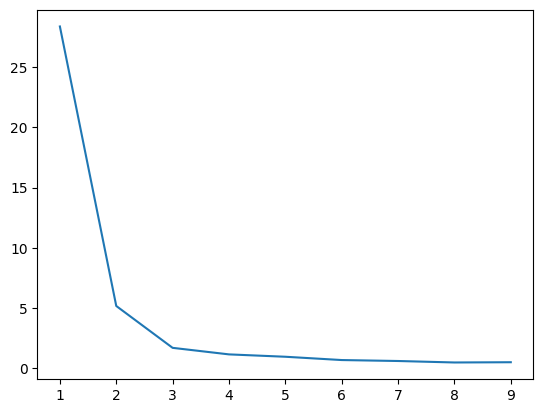

In [77]:
plt.plot(km_range, SSE)